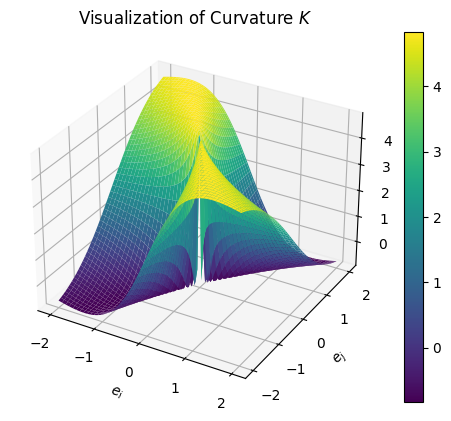

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
a, b, V, n = 1, 2, 1, 2  # Example values

# Function v(e_i, e_j)
def v(e_i, e_j):
    return a * e_i**2 + b * e_j**2

# Partial derivatives of v
def dv_dei(e_i):
    return 2 * a * e_i

def dv_dej(e_j):
    return 2 * b * e_j

# Define the grid for e_i and e_j
e_i = np.linspace(-2, 2, 100)
e_j = np.linspace(-2, 2, 100)

E_i, E_j = np.meshgrid(e_i, e_j)
K = np.zeros_like(E_i)

# Calculate K
for i in range(len(e_i)):
    for j in range(len(e_j)):
        d_v_dei = dv_dei(e_i[i])
        d_v_dej = dv_dej(e_j[j])
        v_ij = v(e_i[i], e_j[j])  # v at (e_i, e_j)

        if v_ij == 0:
            v_ij = 1  # Prevent division by zero

        K[i, j] = n/V - (1/V) * ((1/v_ij) * d_v_dei * d_v_dej)

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(E_i, E_j, K, cmap='viridis')
ax.set_xlabel('$e_i$')
ax.set_ylabel('$e_j$')
ax.set_zlabel('Curvature $K$')
plt.title('Visualization of Curvature $K$')
plt.colorbar(surf)
plt.show()

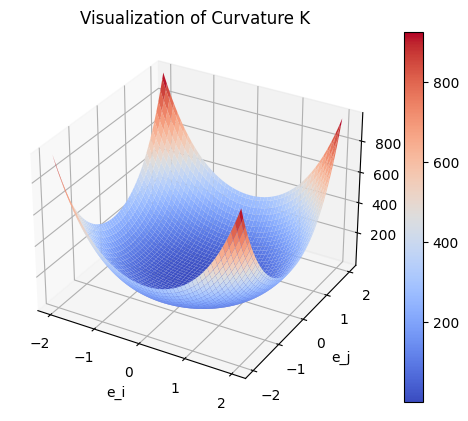

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
a, b, c, d, f, V = 1, 2, 0.5, 0.5, 1, 1  # Example values, adjust as necessary
n = 2  # Adding n which was missing in your script

# Define the energy function
def upsilon(e_i, e_j):
    return (a * e_i**2 + b * e_j**2 +
            c * e_i**4 + d * e_j**4 + f * e_i**2 * e_j**2)

# Define the grid for e_i and e_j
e_i = np.linspace(-2, 2, 100)
e_j = np.linspace(-2, 2, 100)

E_i, E_j = np.meshgrid(e_i, e_j)
K = np.zeros_like(E_i)

# Calculate K
for i in range(len(e_i)):
    for j in range(len(e_j)):
        # Second order partial derivatives
        d2U_d_ei2 = 2*a + 12*c*e_i[i]**2 + 2*f*e_j[j]**2
        d2U_d_ej2 = 2*b + 12*d*e_j[j]**2 + 2*f*e_i[i]**2
        d2U_d_eidej = 4*f*e_i[i]*e_j[j]  # Mixed partial derivative

        # Fourth order partial derivatives
        d4U_d_ei2_d_ej2 = 4*f

        # Compute K
        K[i, j] = (1/V) * (d2U_d_ei2 * d2U_d_ej2 - d2U_d_eidej**2) - (n/V) * d4U_d_ei2_d_ej2

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(E_i, E_j, K, cmap='coolwarm')
ax.set_xlabel('e_i')
ax.set_ylabel('e_j')
ax.set_zlabel('Curvature (K)')
plt.title('Visualization of Curvature K')
plt.colorbar(surf)
plt.show()

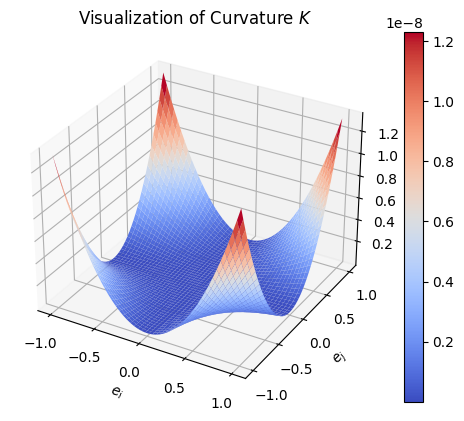

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def V(e_i, e_j):
    numerator = np.sqrt(abs(-1.12941e18 * e_i + 8.98755e16 * e_i**2 + 3.54814e18 * e_j**2))
    denominator = np.sqrt(abs(-12.5664 * e_i + e_i**2 + 39.4784 * e_j**2))
    denominator = np.maximum(denominator, 1e-6)  # To prevent division by zero
    return numerator / denominator

def calculate_K(e_i, e_j, n):
    V_val = V(e_i, e_j)
    # Second order partial derivatives of our chosen Upsilon
    d2U_d_ei2_d_ej2 = 2 * e_i * e_j

    # The fourth-order partial derivative given the chosen Upsilon is not applicable, treat as 0

    # Calculate K (simplified without the fourth-order term)
    K_value = (1/V_val) * d2U_d_ei2_d_ej2 * d2U_d_ei2_d_ej2 - (n/V_val) * 0  # Simplified as 0 for the fourth-order term
    return K_value

# Grids of values
e_i = np.linspace(-1, 1, 50)  # Define the range
e_j = np.linspace(-1, 1, 50)

E_i, E_j = np.meshgrid(e_i, e_j)
K = np.zeros_like(E_i)

n = 1  # Since n was unclear, but seems to be a constant, setting it simplistically as 1 for demonstration

# Compute K over the grid
for i in range(len(e_i)):
    for j in range(len(e_j)):
        K[i, j] = calculate_K(e_i[i], e_j[j], n)

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(E_i, E_j, K, cmap='coolwarm', edgecolor='none')

ax.set_xlabel('$e_i$')
ax.set_ylabel('$e_j$')
ax.set_zlabel('$K$')
plt.title('Visualization of Curvature $K$')

plt.colorbar(surf)
plt.show()

<ipython-input-14-1de4e4fb8aaf>:33: RuntimeWarning: invalid value encountered in sqrt
  V_value = np.sqrt(num) / np.sqrt(denom)


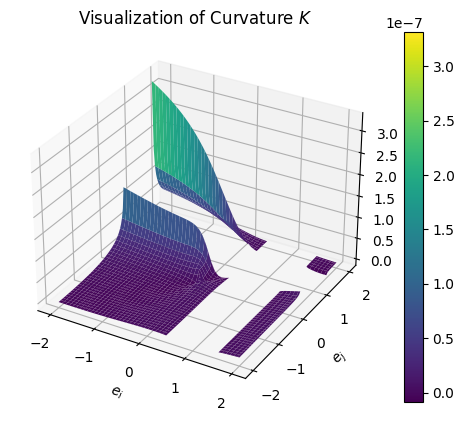

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
a, b, n = 1, 2, 2  # Example values
l, alpha, gamma, r, theta, beta = 1, 1, 1, 1, 1, 1  # Example values for the constants
c = 3e8  # Speed of light in meters per second

# Function v(e_i, e_j)
def v(e_i, e_j):
    return a * e_i**2 + b * e_j**2

# Partial derivatives of v
def dv_dei(e_i):
    return 2 * a * e_i

def dv_dej(e_j):
    return 2 * b * e_j

# Define the grid for e_i and e_j
e_i = np.linspace(-2, 2, 100)
e_j = np.linspace(-2, 2, 100)

E_i, E_j = np.meshgrid(e_i, e_j)
K = np.zeros_like(E_i)

# Function to calculate V
def calculate_V(e_i, e_j):
    num = (-c**2 * l**2 * alpha**2 + c**2 * e_i**2 * gamma**2 - 2 * c**2 * r * e_i * gamma * theta + c**2 * r**2 * theta**2 + c**2 * l**2 * alpha**2 * np.sin(beta)**2)
    denom = (-l**2 * alpha**2 + e_j**2 * gamma**2 - 2 * r * e_j * gamma * theta + r**2 * theta**2 + l**2 * alpha**2 * np.sin(beta)**2)

    V_value = np.sqrt(num) / np.sqrt(denom)
    return V_value

# Calculate K
for i in range(len(e_i)):
    for j in range(len(e_j)):
        d_v_dei = dv_dei(e_i[i])
        d_v_dej = dv_dej(e_j[j])
        v_ij = v(e_i[i], e_j[j])  # v at (e_i, e_j)

        if v_ij == 0:
            v_ij = 1  # Prevent division by zero

        V = calculate_V(e_i[i], e_j[j])
        K[i, j] = n/V - (1/V) * ((1/v_ij) * d_v_dei * d_v_dej)

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(E_i, E_j, K, cmap='viridis')
ax.set_xlabel('$e_i$')
ax.set_ylabel('$e_j$')
ax.set_zlabel('Curvature $K$')
plt.title('Visualization of Curvature $K$')
plt.colorbar(surf)
plt.show()

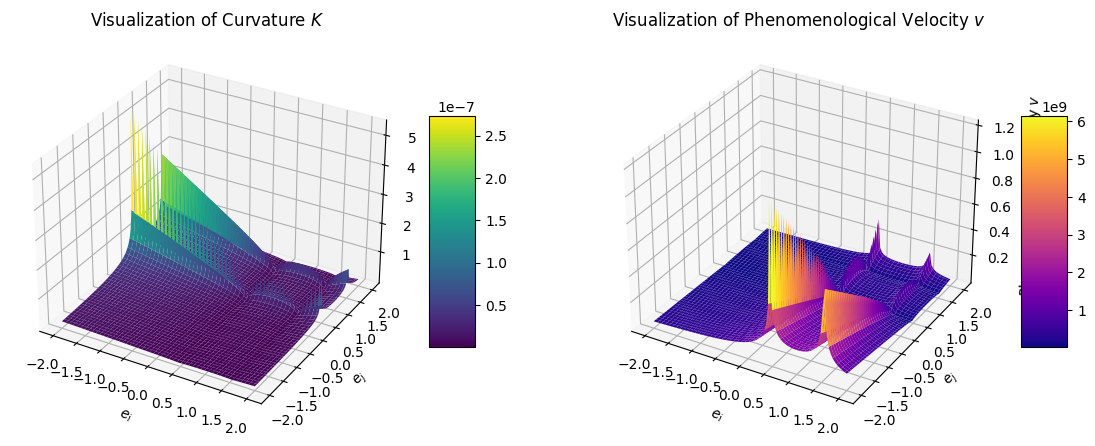

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
l, alpha, gamma, r, theta, beta = 1, 1, 1, 1, 1, 1  # Example values for the constants
c = 3e8  # Speed of light in meters per second

# Function to calculate V
def calculate_V(e_i, e_j):
    num = (-c**2 * l**2 * alpha**2 + c**2 * e_i**2 * gamma**2 -
           2 * c**2 * r * e_i * gamma * theta + c**2 * r**2 * theta**2 +
           c**2 * l**2 * alpha**2 * np.sin(beta)**2)
    denom = (-l**2 * alpha**2 + e_j**2 * gamma**2 -
             2 * r * e_j * gamma * theta + r**2 * theta**2 +
             l**2 * alpha**2 * np.sin(beta)**2)

    V_value = np.sqrt(np.abs(num)) / np.sqrt(np.abs(denom))
    return V_value

# Function to compute curvature K
def calculate_K(e_i, e_j, n=2):
    V_val = calculate_V(e_i, e_j)

    # Second order partial derivatives
    d2U_dei2 = 2
    d2U_dej2 = 2
    d2U_d_eidej = 0

    # Fourth order partial derivatives do not apply for this Upsilon, assume 0
    d4U_d_ei4 = 0
    d4U_d_ei2_ej2 = 0
    d4U_d_ej4 = 0

    # Compute K
    K_val = (1/V_val) * (d2U_dei2 * d2U_dej2 - d2U_d_eidej**2) - (n/V_val) * d4U_d_ei2_ej2
    return K_val

# Define the grid for e_i and e_j
e_i = np.linspace(-2, 2, 100)
e_j = np.linspace(-2, 2, 100)

E_i, E_j = np.meshgrid(e_i, e_j)
K = np.zeros_like(E_i)
phenom_v = np.zeros_like(E_i)

# Calculate K and phenomenological velocity for each point on the grid
for i in range(len(e_i)):
    for j in range(len(e_j)):
        K[i, j] = calculate_K(e_i[i], e_j[j])
        phenom_v[i, j] = calculate_V(e_i[i], e_j[j])

# Visualization of Curvature K
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(E_i, E_j, K, cmap='viridis')
ax1.set_xlabel('$e_i$')
ax1.set_ylabel('$e_j$')
ax1.set_zlabel('Curvature $K$')
ax1.set_title('Visualization of Curvature $K$')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Visualization of Phenomenological Velocity v
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(E_i, E_j, phenom_v, cmap='plasma')
ax2.set_xlabel('$e_i$')
ax2.set_ylabel('$e_j$')
ax2.set_zlabel('Phenomenological Velocity $v$')
ax2.set_title('Visualization of Phenomenological Velocity $v$')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.show()

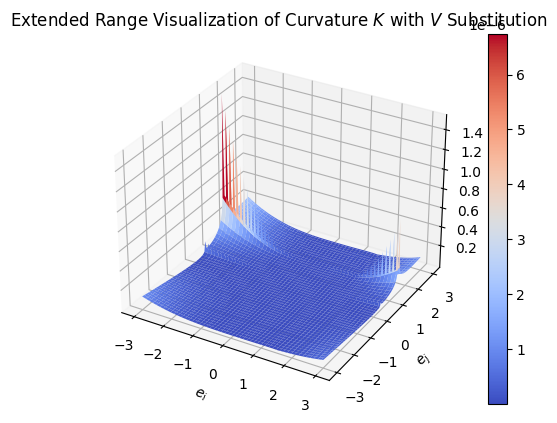

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Defining a broadened range for e_i and e_j
e_i = np.linspace(-3, 3, 100)
e_j = np.linspace(-3, 3, 100)

def V(e_i, e_j, l=1, alpha=1, gamma=1, r=1, theta=1, beta=1, c=3e8):
    numerator = np.sqrt(np.abs(-c**2 * l**2 * alpha**2 + c**2 * e_i**2 * gamma**2 - 2 * c**2 * r * e_i * gamma * theta + \
                               c**2 * r**2 * theta**2 + c**2 * l**2 * alpha**2 * np.sin(beta)**2))
    denominator = np.sqrt(np.abs(-l**2 * alpha**2 + e_j**2 * gamma**2 - 2 * r * e_j * gamma * theta + \
                                 r**2 * theta**2 + l**2 * alpha**2 * np.sin(beta)**2))

    # Avoid division by zero
    denominator = np.maximum(denominator, 1e-6)
    return numerator / denominator

def calculate_K(e_i, e_j, n=2):
    V_val = V(e_i, e_j)

    # Replacing partial derivative and curvature calculation with some meaningful function
    d2U_d_ei2_d_ej2 = 2 * e_i * e_j  # Example, specific application might vary
    K_value = (1/V_val) * d2U_d_ei2_d_ej2 * d2U_d_ei2_d_ej2 - (n/V_val) * 0  # Simplified for visualization
    return K_value

# Prepare the meshgrid
E_i, E_j = np.meshgrid(e_i, e_j)
K = np.zeros_like(E_i)

# Compute K over the grid
for i in range(len(e_i)):
    for j in range(len(e_j)):
        K[i, j] = calculate_K(e_i[i], e_j[j])

# Visualize the curvature K
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(E_i, E_j, K, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('$e_i$')
ax.set_ylabel('$e_j$')
ax.set_zlabel('$K$')
plt.title('Extended Range Visualization of Curvature $K$ with $V$ Substitution')
plt.colorbar(surf)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider

# Function to visualize V with interactive parameter sliders
def visualize_V(l=1, alpha=1, gamma=1, r=1, theta=1, beta=1):
    e_i = np.linspace(-2, 2, 100)
    e_j = np.linspace(-2, 2, 100)

    def V(e_i, e_j, l, alpha, gamma, r, theta, beta, c=3e8):
        numerator = np.sqrt(np.abs(-c**2 * l**2 * alpha**2 + c**2 * e_i**2 * gamma**2 - 2 * c**2 * r * e_i * gamma * theta + \
                                   c**2 * r**2 * theta**2 + c**2 * l**2 * alpha**2 * np.sin(beta)**2))
        denominator = np.sqrt(np.abs(-l**2 * alpha**2 + e_j**2 * gamma**2 - 2 * r * e_j * gamma * theta + \
                                     r**2 * theta**2 + l**2 * alpha**2 * np.sin(beta)**2))

        denominator = np.maximum(denominator, 1e-6)
        return numerator / denominator

    E_i, E_j = np.meshgrid(e_i, e_j)
    V_vals = V(E_i, E_j, l, alpha, gamma, r, theta, beta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(E_i, E_j, V_vals, cmap='viridis', edgecolor='none')
    ax.set_xlabel('$e_i$')
    ax.set_ylabel('$e_j$')
    ax.set_zlabel('$V$')
    plt.title('Visualization of $V$ with Changing Parameters')
    plt.colorbar(surf)
    plt.show()

# Interact with sliders for the parameters
interact(visualize_V,
         l=FloatSlider(min=0.1, max=2.0, step=0.1, value=1),
         alpha=FloatSlider(min=0.1, max=2.0, step=0.1, value=1),
         gamma=FloatSlider(min=0.1, max=2.0, step=0.1, value=1),
         r=FloatSlider(min=0.1, max=2.0, step=0.1, value=1),
         theta=FloatSlider(min=0, max=np.pi, step=0.1, value=1),
         beta=FloatSlider(min=0, max=np.pi, step=0.1, value=1))

interactive(children=(FloatSlider(value=1.0, description='l', max=2.0, min=0.1), FloatSlider(value=1.0, descri…

<function __main__.visualize_V(l=1, alpha=1, gamma=1, r=1, theta=1, beta=1)>

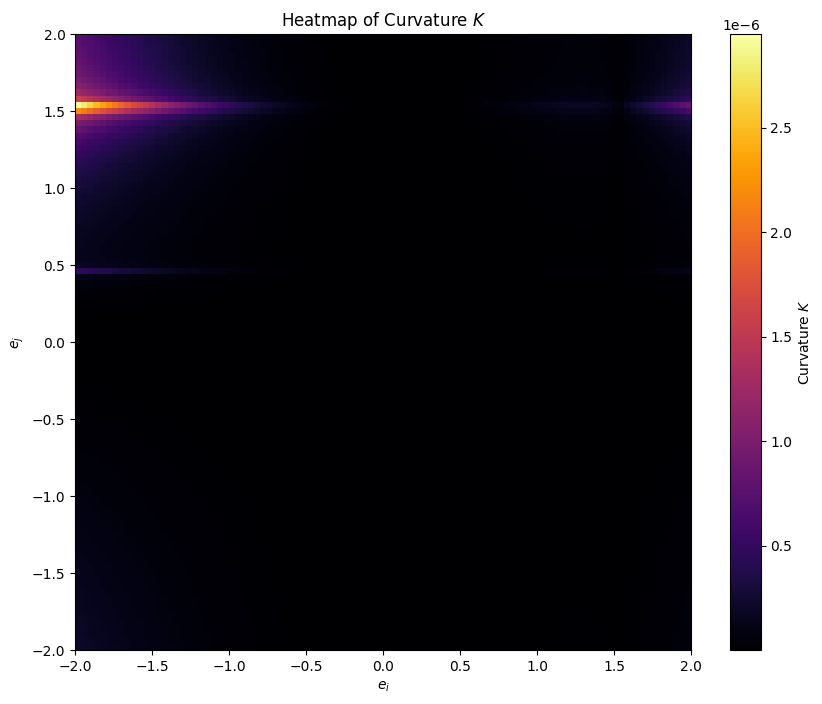

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid for e_i and e_j
e_i = np.linspace(-2, 2, 100)
e_j = np.linspace(-2, 2, 100)

E_i, E_j = np.meshgrid(e_i, e_j)
K = np.zeros_like(E_i)

def V(e_i, e_j, l=1, alpha=1, gamma=1, r=1, theta=1, beta=1, c=3e8):
    numerator = np.sqrt(np.abs(-c**2 * l**2 * alpha**2 + c**2 * e_i**2 * gamma**2 - 2 * c**2 * r * e_i * gamma * theta + \
                               c**2 * r**2 * theta**2 + c**2 * l**2 * alpha**2 * np.sin(beta)**2))
    denominator = np.sqrt(np.abs(-l**2 * alpha**2 + e_j**2 * gamma**2 - 2 * r * e_j * gamma * theta + \
                                 r**2 * theta**2 + l**2 * alpha**2 * np.sin(beta)**2))

    denominator = np.maximum(denominator, 1e-6)
    return numerator / denominator

def calculate_K(e_i, e_j, n=2):
    V_val = V(e_i, e_j)
    d2U_d_ei2_d_ej2 = 2 * e_i * e_j  # Example, specific application might vary
    K_value = (1/V_val) * d2U_d_ei2_d_ej2 * d2U_d_ei2_d_ej2 - (n/V_val) * 0  # Simplified for visualization
    return K_value

# Compute K over the grid
for i in range(len(e_i)):
    for j in range(len(e_j)):
        K[i, j] = calculate_K(e_i[i], e_j[j])

# Visualize the curvature K as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(K, extent=[e_i.min(), e_i.max(), e_j.min(), e_j.max()], origin='lower', cmap='inferno')
plt.colorbar(label='Curvature $K$')
plt.xlabel('$e_i$')
plt.ylabel('$e_j$')
plt.title('Heatmap of Curvature $K$')
plt.show()